# **Visualizing Basic Waveforms of Linear Synthesiser with Python**

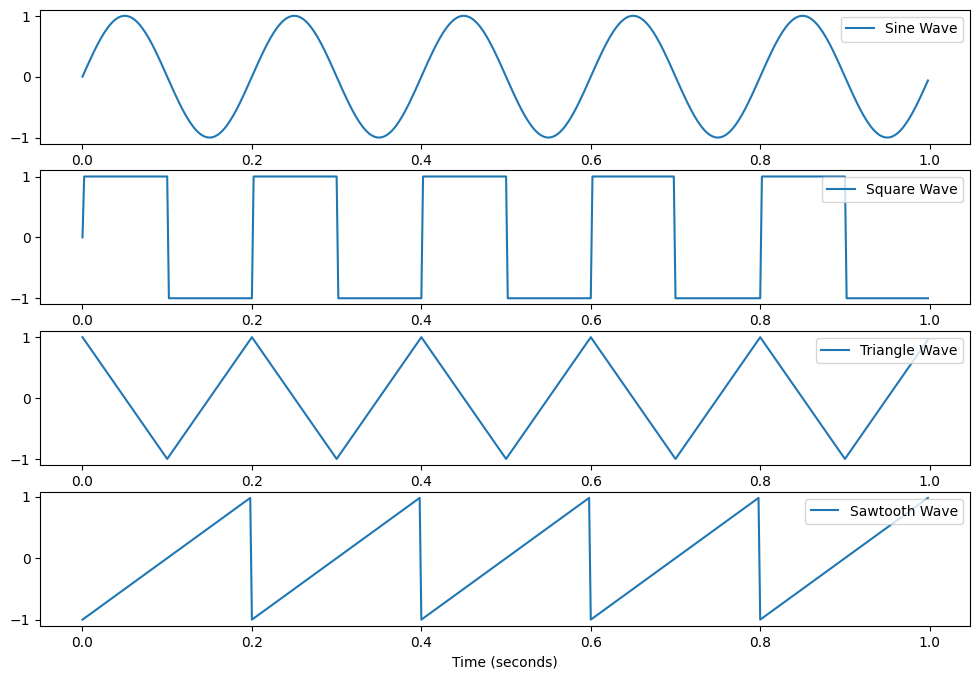

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Time vector
t = np.linspace(0, 1, 500, endpoint=False)

# Generating basic waveforms
sine_wave = np.sin(2 * np.pi * 5 * t)
square_wave = np.sign(np.sin(2 * np.pi * 5 * t))
triangle_wave = 2 * np.abs(2 * (t * 5 % 1) - 1) - 1
sawtooth_wave = 2 * (t * 5 % 1) - 1

# Plotting the waveforms
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(t, sine_wave, label='Sine Wave')
plt.legend(loc='upper right')

plt.subplot(412)
plt.plot(t, square_wave, label='Square Wave')
plt.legend(loc='upper right')

plt.subplot(413)
plt.plot(t, triangle_wave, label='Triangle Wave')
plt.legend(loc='upper right')

plt.subplot(414)
plt.plot(t, sawtooth_wave, label='Sawtooth Wave')
plt.legend(loc='upper right')

plt.xlabel('Time (seconds)')
plt.show()


# **In the graph, each phase of the ADSR (Attack, Decay, Sustain, Release) envelope is clearly marked with different colors, making it easy to identify:**

* Attack (Green): The quick rise at the beginning where the sound reaches its peak. This phase is short and steep.
* Decay (Red): Immediately following the attack, the amplitude decreases to the sustain level. It's a relatively swift drop compared to the attack.
* Sustain (Yellow): This level phase maintains a constant amplitude as long as the note is held. It is visually represented by a flat, extended line.
* Release (Purple): The final phase where the amplitude fades back to zero after the note is released. This tail-off is also quick and concludes the sound's envelope.

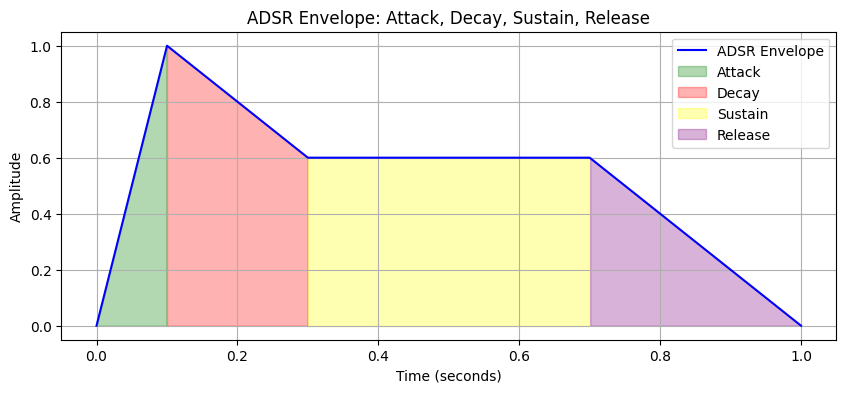

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Time vector for the entire ADSR cycle
t = np.linspace(0, 1, 1000)

# ADSR parameters
attack_time = 0.1
decay_time = 0.2
sustain_level = 0.6
release_time = 0.3
total_duration = 1  # Total duration of 1 second

# Generate ADSR envelope
adsr_envelope = np.zeros_like(t)

# Attack phase
attack_indices = t < attack_time
adsr_envelope[attack_indices] = (t[attack_indices] / attack_time)

# Decay phase
decay_indices = (t >= attack_time) & (t < attack_time + decay_time)
adsr_envelope[decay_indices] = ((1 - sustain_level) * (1 - (t[decay_indices] - attack_time) / decay_time)) + sustain_level

# Sustain phase
sustain_indices = (t >= attack_time + decay_time) & (t < total_duration - release_time)
adsr_envelope[sustain_indices] = sustain_level

# Release phase
release_indices = t >= total_duration - release_time
adsr_envelope[release_indices] = sustain_level * (1 - (t[release_indices] - (total_duration - release_time)) / release_time)

# Plotting the ADSR envelope
plt.figure(figsize=(10, 4))
plt.plot(t, adsr_envelope, label='ADSR Envelope', color='blue')
plt.fill_between(t, 0, adsr_envelope, where=attack_indices, color='green', alpha=0.3, label='Attack')
plt.fill_between(t, 0, adsr_envelope, where=decay_indices, color='red', alpha=0.3, label='Decay')
plt.fill_between(t, 0, adsr_envelope, where=sustain_indices, color='yellow', alpha=0.3, label='Sustain')
plt.fill_between(t, 0, adsr_envelope, where=release_indices, color='purple', alpha=0.3, label='Release')
plt.title('ADSR Envelope: Attack, Decay, Sustain, Release')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


# **Non Linear Synthesisers**

* Original Carrier Wave: This is the base sine wave at 50 Hz, used as the starting point for modulation.

* Frequency Modulation (FM): Here, the original carrier's frequency is modulated by another waveform, creating a wave with varying frequency and amplitude over time. This results in a complex sound with rich harmonic content.

* Amplitude Modulation (AM): The amplitude of the carrier wave is modulated, leading to periodic variations in amplitude. This produces the tremolo effect, where the loudness of the wave fluctuates over time.

* Ring Modulation (RM): The carrier wave is multiplied by the modulating wave, producing a signal that contains frequencies that are the sum and difference of the original and modulating frequencies. This results in a more metallic and inharmonic sound.

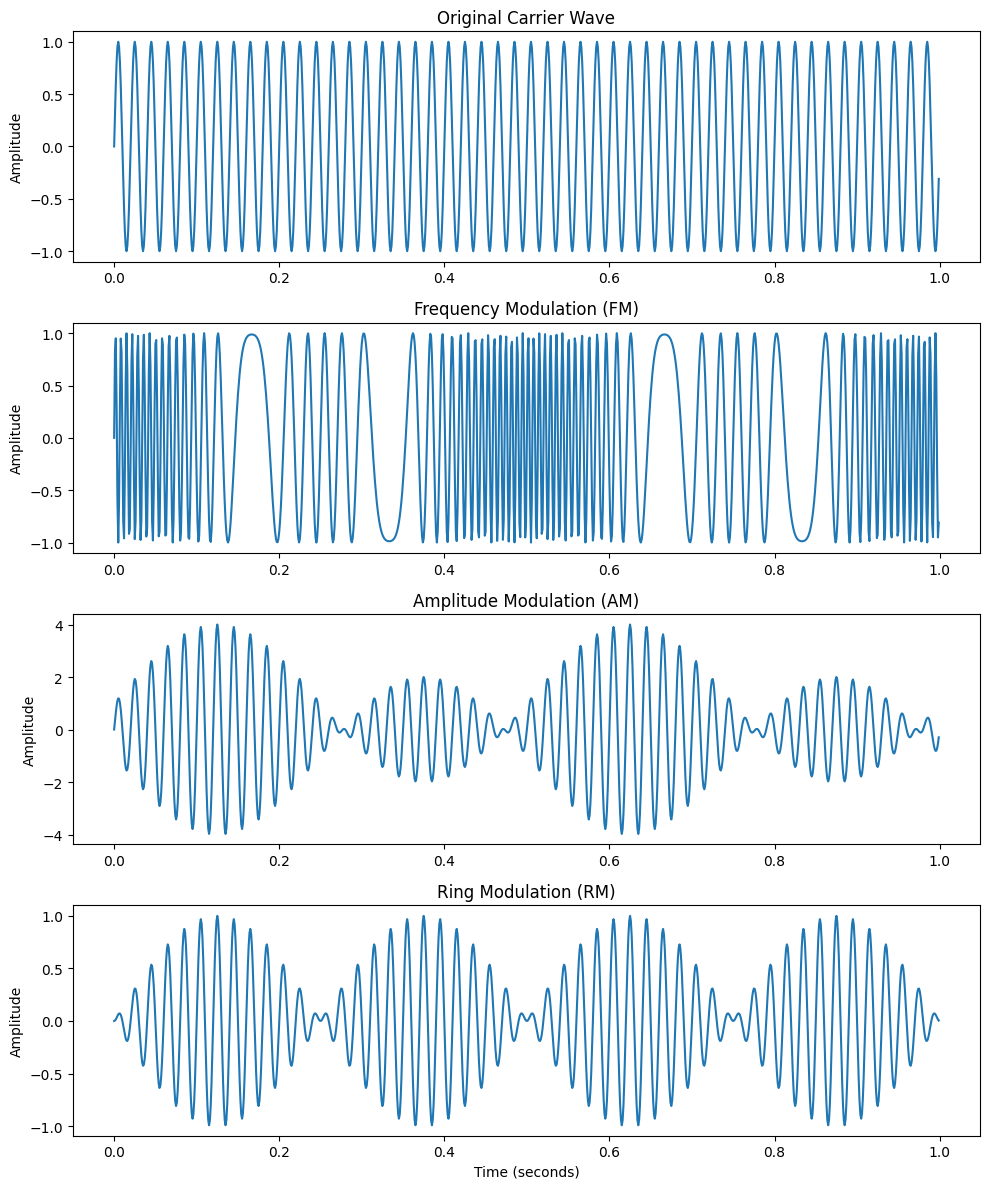

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Time vector
t = np.linspace(0, 1, 1000, endpoint=False)

# Carrier wave parameters
carrier_frequency = 50  # in Hz
carrier_wave = np.sin(2 * np.pi * carrier_frequency * t)

# Modulating wave parameters
modulating_frequency = 2  # in Hz
modulation_index_fm = 50  # Larger modulation index for FM
modulation_index_am = 3   # Standard modulation index for AM

# Frequency Modulation (FM)
fm_wave = np.sin(2 * np.pi * carrier_frequency * t + modulation_index_fm * np.sin(2 * np.pi * modulating_frequency * t))

# Amplitude Modulation (AM)
am_wave = (1 + modulation_index_am * np.sin(2 * np.pi * modulating_frequency * t)) * carrier_wave

# Ring Modulation (RM)
rm_wave = carrier_wave * np.sin(2 * np.pi * modulating_frequency * t)

# Plotting
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))
axes[0].plot(t, carrier_wave)
axes[0].set_title('Original Carrier Wave')
axes[0].set_ylabel('Amplitude')

axes[1].plot(t, fm_wave)
axes[1].set_title('Frequency Modulation (FM)')
axes[1].set_ylabel('Amplitude')

axes[2].plot(t, am_wave)
axes[2].set_title('Amplitude Modulation (AM)')
axes[2].set_ylabel('Amplitude')

axes[3].plot(t, rm_wave)
axes[3].set_title('Ring Modulation (RM)')
axes[3].set_xlabel('Time (seconds)')
axes[3].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()
